## Day-04 Decision Tree


In [48]:
# import libraries
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# Data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 

# Display dataset information
print("Dataset Shape:", X.shape)
print("\nFirst few rows of features:")
print(X.head())
print("\nFirst few rows of target:")
print(y.head())


Dataset Shape: (17379, 13)

First few rows of features:
       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  
0  0.24  0.2879  0.81        0.0  
1  0.22  0.2727  0.80        0.0  
2  0.22  0.2727  0.80        0.0  
3  0.24  0.2879  0.75        0.0  
4  0.24  0.2879  0.75        0.0  

First few rows of target:
   cnt
0   16
1   40
2   32
3   13
4    1


In [50]:
# Display dataset information
print("Dataset Shape:", X.shape)
print("\nFirst few rows of features:")
print(X.head())
print("\nFirst few rows of target:")
print(y.head())


Dataset Shape: (17379, 13)

First few rows of features:
       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  
0  0.24  0.2879  0.81        0.0  
1  0.22  0.2727  0.80        0.0  
2  0.22  0.2727  0.80        0.0  
3  0.24  0.2879  0.75        0.0  
4  0.24  0.2879  0.75        0.0  

First few rows of target:
   cnt
0   16
1   40
2   32
3   13
4    1


### Data Preprocessing

In [51]:
# Check for missing values
print("\nMissing values in features:", X.isnull().sum())
print("\nMissing values in target:", y.isnull().sum())


Missing values in features: dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
dtype: int64

Missing values in target: cnt    0
dtype: int64


In [52]:
# check info:
print("\nInfo of features:")
print(X.info())
print("\nInfo of target:")
print(y.info())


Info of features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
dtypes: float64(4), int64(8), object(1)
memory usage: 1.7+ MB
None

Info of target:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -

In [53]:
# Check for duplicates
print("\nDuplicate rows in features:", X.duplicated().sum())
print("\nDuplicate rows in target:", y.duplicated().sum())


Duplicate rows in features: 0

Duplicate rows in target: 16510


In [54]:
# Display basic statistics
print("\nBasic statistics of features:")
print(X.describe())
print("\nBasic statistics of target:")
print(y.describe())


Basic statistics of features:
             season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771 

In [55]:
X.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [56]:
# convert date to datetime and extract usefull info
X['dteday'] = pd.to_datetime(X['dteday'])
X['day'] = X['dteday'].dt.day
X['dayofyear'] = X['dteday'].dt.dayofyear

In [57]:
# Drop the original date column as we've extracted useful features
X = X.drop('dteday', axis=1)

In [58]:
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,day,dayofyear
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,1,1
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,1,1
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,1,1
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,1,1
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


In [59]:
X.tail()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,day,dayofyear
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,31,366
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,31,366
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,31,366
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,31,366
17378,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,31,366


### (EDA): Data Exploration

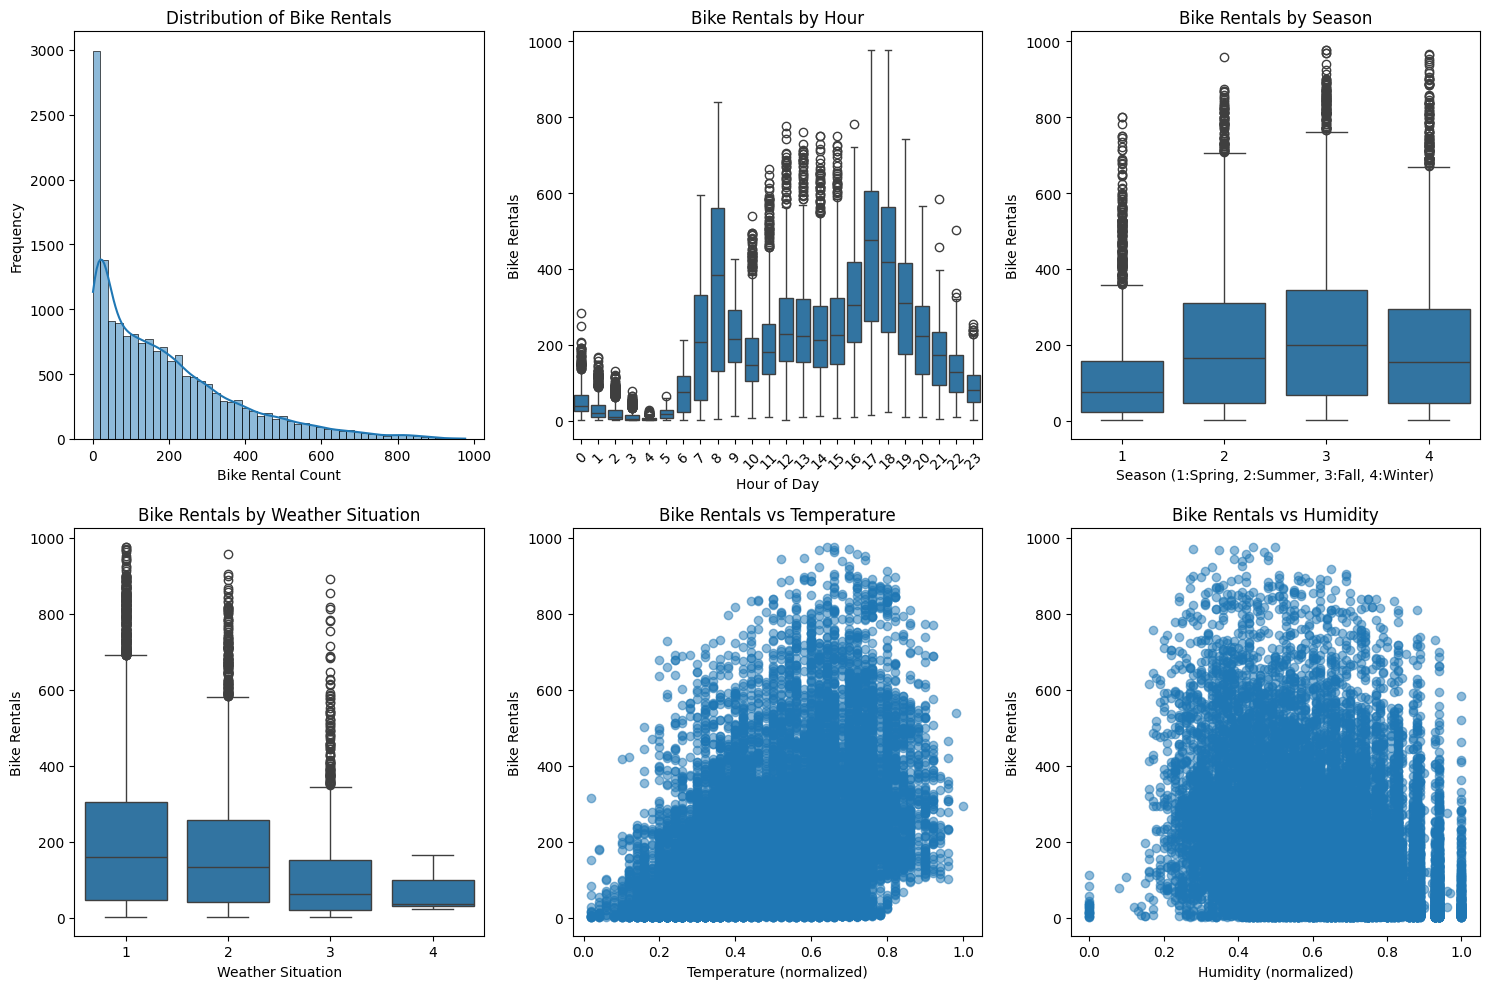

In [60]:
# 1. Distribution of target variable
plt.figure(figsize=(15, 10))

# Distribution of bike rentals
plt.subplot(2, 3, 1)
sns.histplot(y['cnt'], bins=50, kde=True)
plt.title('Distribution of Bike Rentals')
plt.xlabel('Bike Rental Count')
plt.ylabel('Frequency')

# Bike rentals by hour
plt.subplot(2, 3, 2)
sns.boxplot(data=X, x='hr', y=y['cnt'])
plt.title('Bike Rentals by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Bike Rentals')
plt.xticks(rotation=45)

# Bike rentals by season
plt.subplot(2, 3, 3)
sns.boxplot(data=X, x='season', y=y['cnt'])
plt.title('Bike Rentals by Season')
plt.xlabel('Season (1:Spring, 2:Summer, 3:Fall, 4:Winter)')
plt.ylabel('Bike Rentals')

# Bike rentals by weather situation
plt.subplot(2, 3, 4)
sns.boxplot(data=X, x='weathersit', y=y['cnt'])
plt.title('Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Bike Rentals')

# Bike rentals by temperature
plt.subplot(2, 3, 5)
plt.scatter(X['temp'], y['cnt'], alpha=0.5)
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Temperature (normalized)')
plt.ylabel('Bike Rentals')

# Bike rentals by humidity
plt.subplot(2, 3, 6)
plt.scatter(X['hum'], y['cnt'], alpha=0.5)
plt.title('Bike Rentals vs Humidity')
plt.xlabel('Humidity (normalized)')
plt.ylabel('Bike Rentals')

plt.tight_layout()
plt.show()


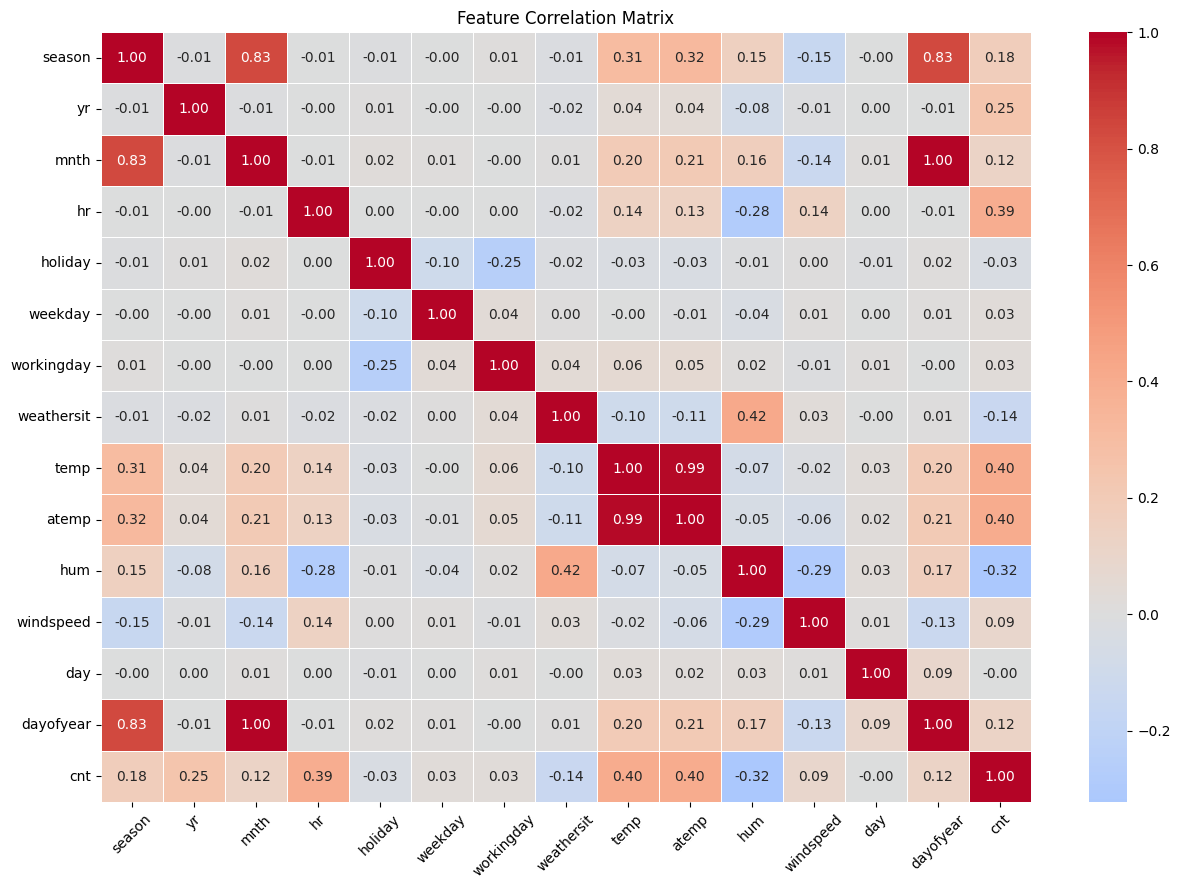

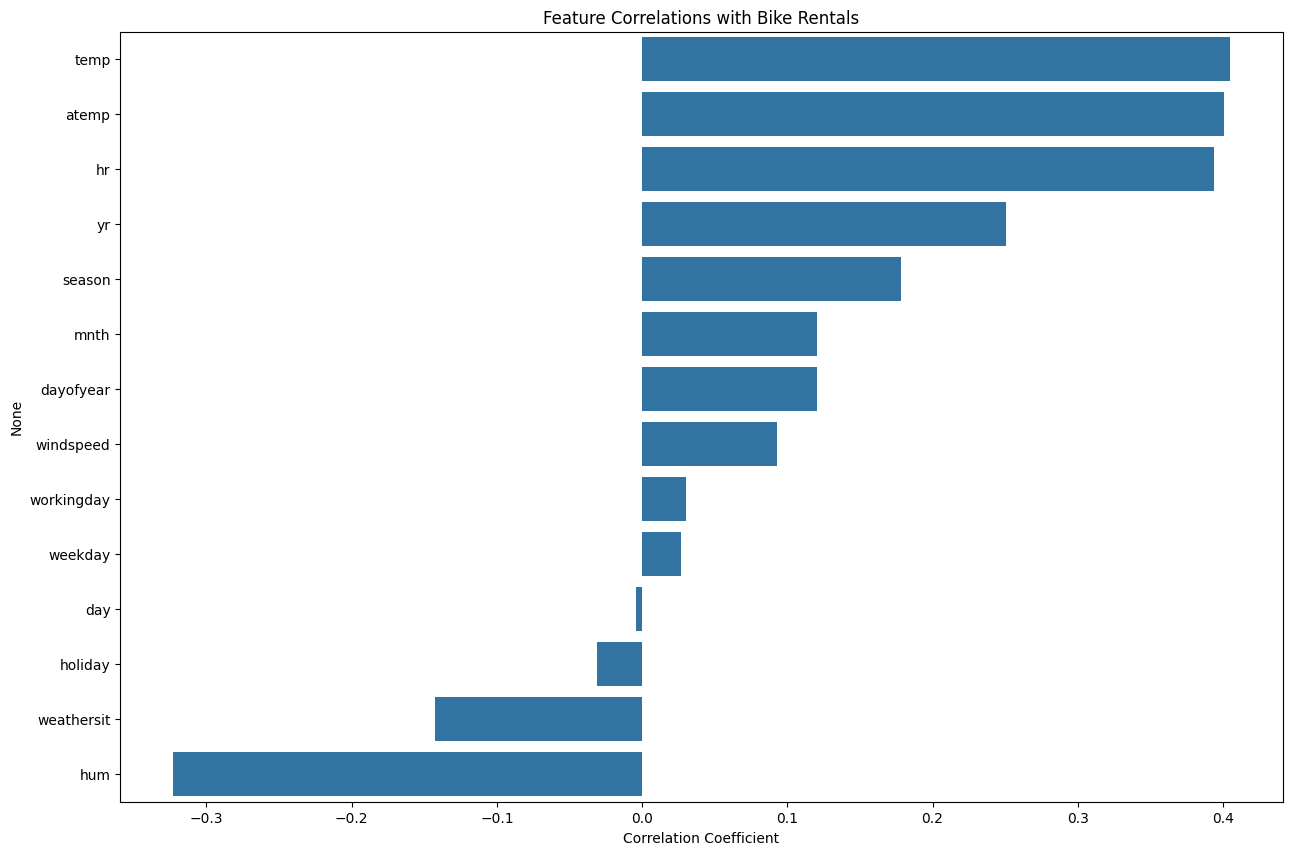

In [61]:
# Correlation analysis
from statistics import correlation


df_combined = X.copy()
df_combined['cnt'] = y['cnt']

# Correlation heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = df_combined.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.figure(figsize=(15, 10))
target_correlations = correlation_matrix['cnt'].drop('cnt').sort_values(ascending=False)
sns.barplot(x=target_correlations.values, y=target_correlations.index)
plt.title('Feature Correlations with Bike Rentals')
plt.xlabel('Correlation Coefficient')
plt.show()

### Feature Engineering

In [62]:
# Simple Features Engineering
X_simple = X.copy()

# Or add 1-2 simple features if you want to demonstrate feature engineering
X_simple['is_weekend'] = ((X_simple['weekday'] == 0) | (X_simple['weekday'] == 6)).astype(int)
X_simple['is_working_hours'] = ((X_simple['hr'] >= 8) & (X_simple['hr'] <= 18)).astype(int)

print(f"Features for simple model: {X_simple.shape[1]}")

Features for simple model: 16


In [63]:
X_simple.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,day,dayofyear,is_weekend,is_working_hours
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,1,1,1,0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,1,1,1,0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,1,1,1,0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,1,1,1,0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1,1,0


### Data Prep

In [64]:
# Split the data
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train_simple.shape[0]}")
print(f"Test set size: {X_test_simple.shape[0]}")

Training set size: 13903
Test set size: 3476


In [ ]:
# Build and evaluate Decision Tree model
from sklearn.model_selection import GridSearchCV

def evaluate_model(model, X_train_simple, X_test_simple, y_train_simple, y_test_simple):
    
    # Make predictions
    y_train_pred = model.predict(X_train_simple)
    y_test_pred = model.predict(X_test_simple)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train_simple, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test_simple, y_test_pred))
    train_mae = mean_absolute_error(y_train_simple, y_train_pred)
    test_mae = mean_absolute_error(y_test_simple, y_test_pred)
    train_r2 = r2_score(y_train_simple, y_train_pred)
    test_r2 = r2_score(y_test_simple, y_test_pred)

    print("Training Performance:")
    print(f"RMSE: {train_rmse:.2f}")
    print(f"MAE: {train_mae:.2f}")
    print(f"R² Score: {train_r2:.4f}")
    
    print("\nTest Performance:")
    print(f"RMSE: {test_rmse:.2f}")
    print(f"MAE: {test_mae:.2f}")
    print(f"R² Score: {test_r2:.4f}")

    return {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'y_test_pred': y_test_pred
    }


In [68]:
print("=== Basic Decision Tree ===")
dt_basic = DecisionTreeRegressor(random_state=42)
dt_basic.fit(X_train_simple, y_train_simple)
basic_results = evaluate_model(dt_basic, X_train_simple, X_test_simple, y_train_simple, y_test_simple)

=== Basic Decision Tree ===
Training Performance:
RMSE: 0.00
MAE: 0.00
R² Score: 1.0000

Test Performance:
RMSE: 59.03
MAE: 33.96
R² Score: 0.8900


In [ ]:
# Fine-tune Decision Tree
print("\n=== Tuned Decision Tree with Grid Search ===")

# Define parameter grid
param_grid = {
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform grid search
dt_tuned = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(
    dt_tuned, param_grid, cv=5, scoring='neg_mean_squared_error', 
    n_jobs=-1, verbose=1
)

grid_search.fit(X_train_simple, y_train_simple)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate best model
dt_best = grid_search.best_estimator_
tuned_results = evaluate_model(dt_best, X_train_simple, X_test_simple, y_train_simple, y_test_simple)


=== Tuned Decision Tree with Grid Search ===
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Training Performance:
RMSE: 48.73
MAE: 29.58
R² Score: 0.9285

Test Performance:
RMSE: 83.60
MAE: 50.47
R² Score: 0.7793


In [71]:
# Compare model performance

comparison = pd.DataFrame({
    'Model': ['Basic Decision Tree', 'Tuned Decision Tree'],
    'Train RMSE': [basic_results['train_rmse'], tuned_results['train_rmse']],
    'Test RMSE': [basic_results['train_rmse'], tuned_results['train_rmse']],
    'Train R2': [basic_results['test_r2'], tuned_results['test_r2']],
    'Test R²': [basic_results['test_r2'], tuned_results['test_r2']]
})

print("Model Comparison:")
print(comparison)

Model Comparison:
                 Model  Train RMSE  Test RMSE  Train R2   Test R²
0  Basic Decision Tree    0.000000   0.000000  0.889974  0.889974
1  Tuned Decision Tree   48.730688  48.730688  0.779291  0.779291
